In [1]:
import math
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline

Using TensorFlow backend.


In [2]:
bike_data = pd.read_csv("TRAIN.csv", dtype={col: np.float32 for col in ['Dew point temperature(°C)','Temperature(°C)','Wind speed (m/s)', 'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']})

In [3]:
bike_data.drop("Index", axis=1, inplace =True)

In [4]:
bike_data.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.600000,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.600000,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.700001,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.600000,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.600000,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7032 non-null   object 
 1   Hour                       7032 non-null   int64  
 2   Temperature(°C)            7032 non-null   float32
 3   Humidity(%)                7032 non-null   int64  
 4   Wind speed (m/s)           7032 non-null   float32
 5   Visibility (10m)           7032 non-null   int64  
 6   Dew point temperature(°C)  7032 non-null   float32
 7   Solar Radiation (MJ/m2)    7032 non-null   float32
 8   Rainfall(mm)               7032 non-null   float32
 9   Snowfall (cm)              7032 non-null   float32
 10  Seasons                    7032 non-null   object 
 11  Holiday                    7032 non-null   object 
 12  Functioning Day            7032 non-null   object 
 13  Rented Bike Count          7032 non-null   int64

In [6]:
bike_data.describe()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,11.500000,13.154778,58.164960,1.785708,1421.082480,4.323905,0.590294,0.152645,0.076024,689.143203
std,6.922679,12.997927,20.637447,1.053112,613.169137,14.178857,0.893909,1.165239,0.403487,652.151786
min,0.000000,-17.799999,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,1.800000,42.000000,1.000000,918.750000,-6.700000,0.000000,0.000000,0.000000,189.750000
50%,11.500000,15.500000,57.000000,1.600000,1665.000000,6.900000,0.020000,0.000000,0.000000,444.000000
75%,17.250000,24.000000,74.000000,2.400000,1996.000000,16.500000,0.950000,0.000000,0.000000,1035.000000
max,23.000000,39.400002,98.000000,7.400000,2000.000000,27.200001,3.520000,35.000000,5.100000,3556.000000


## Using Spearmen corelation

In [7]:
corr_matrix_ = bike_data.corr()
corr_matrix_['Rented Bike Count'].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.583093
Dew point temperature(°C)    0.441591
Hour                         0.399272
Solar Radiation (MJ/m2)      0.272706
Visibility (10m)             0.193608
Wind speed (m/s)             0.122481
Rainfall(mm)                -0.115995
Humidity(%)                 -0.153432
Snowfall (cm)               -0.156732
Name: Rented Bike Count, dtype: float64

array([[<AxesSubplot:xlabel='Temperature(°C)', ylabel='Temperature(°C)'>,
        <AxesSubplot:xlabel='Dew point temperature(°C)', ylabel='Temperature(°C)'>,
        <AxesSubplot:xlabel='Hour', ylabel='Temperature(°C)'>,
        <AxesSubplot:xlabel='Solar Radiation (MJ/m2)', ylabel='Temperature(°C)'>,
        <AxesSubplot:xlabel='Visibility (10m)', ylabel='Temperature(°C)'>,
        <AxesSubplot:xlabel='Wind speed (m/s)', ylabel='Temperature(°C)'>,
        <AxesSubplot:xlabel='Rainfall(mm)', ylabel='Temperature(°C)'>,
        <AxesSubplot:xlabel='Humidity(%)', ylabel='Temperature(°C)'>,
        <AxesSubplot:xlabel='Snowfall (cm)', ylabel='Temperature(°C)'>],
       [<AxesSubplot:xlabel='Temperature(°C)', ylabel='Dew point temperature(°C)'>,
        <AxesSubplot:xlabel='Dew point temperature(°C)', ylabel='Dew point temperature(°C)'>,
        <AxesSubplot:xlabel='Hour', ylabel='Dew point temperature(°C)'>,
        <AxesSubplot:xlabel='Solar Radiation (MJ/m2)', ylabel='Dew point temperatu

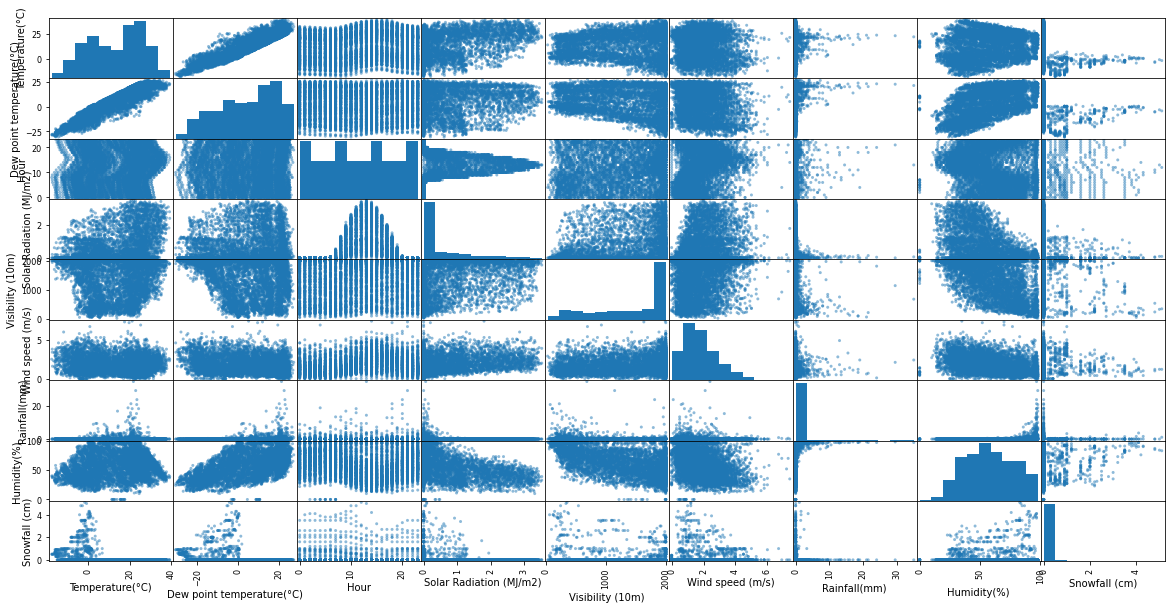

In [8]:
from pandas.plotting import scatter_matrix
attributes = ["Temperature(°C)" , "Dew point temperature(°C)", "Hour", "Solar Radiation (MJ/m2)", "Visibility (10m)", "Wind speed (m/s)","Rainfall(mm)","Humidity(%)","Snowfall (cm)"]
scatter_matrix(bike_data[attributes], figsize = (20,10))

<AxesSubplot:xlabel='Dew point temperature(°C)', ylabel='Temperature(°C)'>

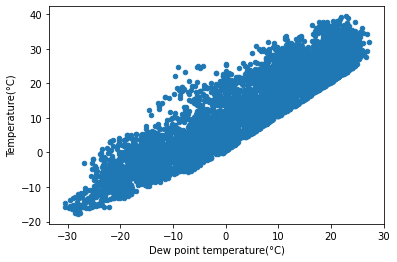

In [9]:
bike_data.plot(kind="scatter", x="Dew point temperature(°C)", y="Temperature(°C)", alpha=1)

In [10]:
bike_data.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.600000,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.600000,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.700001,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.600000,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.600000,0.0,0.0,0.0,Winter,No Holiday,Yes,78


## Hour column is repeating every after 23

In [11]:
corr_matrix_ = bike_data.corr()
corr_matrix_['Rented Bike Count'].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.583093
Dew point temperature(°C)    0.441591
Hour                         0.399272
Solar Radiation (MJ/m2)      0.272706
Visibility (10m)             0.193608
Wind speed (m/s)             0.122481
Rainfall(mm)                -0.115995
Humidity(%)                 -0.153432
Snowfall (cm)               -0.156732
Name: Rented Bike Count, dtype: float64

<AxesSubplot:>

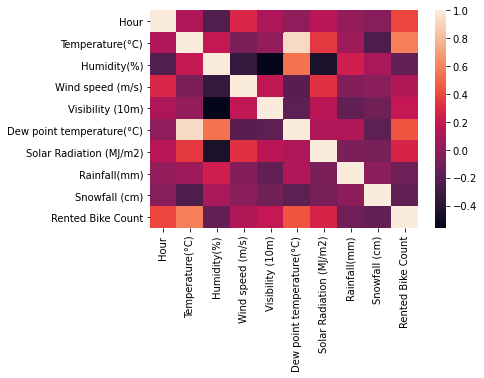

In [12]:
sns.heatmap(corr_matrix_)

## HANDLING CATEGORICAL VALUE

In [13]:
Seasons = pd.get_dummies(bike_data["Seasons"],drop_first=True)
Holiday = pd.get_dummies(bike_data["Holiday"],drop_first=True)
Functioning_Day = pd.get_dummies(bike_data["Functioning Day"],drop_first=True)
bike_data.drop(["Seasons","Holiday","Functioning Day"], axis=1,inplace=True)

In [14]:
bike_data.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.600000,0.0,0.0,0.0,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.600000,0.0,0.0,0.0,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.700001,0.0,0.0,0.0,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.600000,0.0,0.0,0.0,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.600000,0.0,0.0,0.0,78


In [15]:
bike_data =pd.concat([bike_data,Seasons,Holiday,Functioning_Day],axis=1)

## FEATURE SCALING

In [16]:
 bike_data.drop(["Date"],axis=1,inplace=True)

In [17]:
bike_data

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count,Spring,Summer,Winter,No Holiday,Yes
0,0,-5.200000,37,2.2,2000,-17.600000,0.0,0.0,0.0,254,0,0,1,1,1
1,1,-5.500000,38,0.8,2000,-17.600000,0.0,0.0,0.0,204,0,0,1,1,1
2,2,-6.000000,39,1.0,2000,-17.700001,0.0,0.0,0.0,173,0,0,1,1,1
3,3,-6.200000,40,0.9,2000,-17.600000,0.0,0.0,0.0,107,0,0,1,1,1
4,4,-6.000000,36,2.3,2000,-18.600000,0.0,0.0,0.0,78,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,19,23.500000,58,0.4,1836,14.700000,0.0,0.0,0.0,0,0,0,0,1,0
7028,20,22.600000,67,0.3,1737,16.100000,0.0,0.0,0.0,0,0,0,0,1,0
7029,21,21.700001,63,1.8,1078,14.300000,0.0,0.1,0.0,0,0,0,0,1,0
7030,22,20.900000,71,1.6,1057,15.400000,0.0,0.1,0.0,0,0,0,0,1,0


In [18]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       7032 non-null   int64  
 1   Temperature(°C)            7032 non-null   float32
 2   Humidity(%)                7032 non-null   int64  
 3   Wind speed (m/s)           7032 non-null   float32
 4   Visibility (10m)           7032 non-null   int64  
 5   Dew point temperature(°C)  7032 non-null   float32
 6   Solar Radiation (MJ/m2)    7032 non-null   float32
 7   Rainfall(mm)               7032 non-null   float32
 8   Snowfall (cm)              7032 non-null   float32
 9   Rented Bike Count          7032 non-null   int64  
 10  Spring                     7032 non-null   uint8  
 11  Summer                     7032 non-null   uint8  
 12  Winter                     7032 non-null   uint8  
 13  No Holiday                 7032 non-null   uint8

In [19]:
bike_data.drop(["Temperature(°C)"],axis=1,inplace=True)
bike_data.drop(["Dew point temperature(°C)"],axis=1,inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
bike_data.dtypes

Hour                         int64
Humidity(%)                  int64
Wind speed (m/s)           float32
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float32
Rainfall(mm)               float32
Snowfall (cm)              float32
Rented Bike Count            int64
Spring                       uint8
Summer                       uint8
Winter                       uint8
No Holiday                   uint8
Yes                          uint8
dtype: object

In [22]:
#bike_data.round(3)


In [23]:
bike_data

,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count,Spring,Summer,Winter,No Holiday,Yes
0,0,37,2.2,2000,0.0,0.0,0.0,254,0,0,1,1,1
1,1,38,0.8,2000,0.0,0.0,0.0,204,0,0,1,1,1
2,2,39,1.0,2000,0.0,0.0,0.0,173,0,0,1,1,1
3,3,40,0.9,2000,0.0,0.0,0.0,107,0,0,1,1,1
4,4,36,2.3,2000,0.0,0.0,0.0,78,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,19,58,0.4,1836,0.0,0.0,0.0,0,0,0,0,1,0
7028,20,67,0.3,1737,0.0,0.0,0.0,0,0,0,0,1,0
7029,21,63,1.8,1078,0.0,0.1,0.0,0,0,0,0,1,0
7030,22,71,1.6,1057,0.0,0.1,0.0,0,0,0,0,1,0


Changing float to int

In [24]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bike_data)

In [25]:
scaled_data

array([[-1.66132477, -1.02563389,  0.39342572, ...,  1.50185071,
         0.2154729 ,  0.11764706],
       [-1.51686175, -0.97717483, -0.9360622 , ...,  1.50185071,
         0.2154729 ,  0.11764706],
       [-1.37239873, -0.92871578, -0.74613537, ...,  1.50185071,
         0.2154729 ,  0.11764706],
       ...,
       [ 1.37239873,  0.23430144,  0.01357195, ..., -0.66584514,
         0.2154729 , -8.5       ],
       [ 1.51686175,  0.62197385, -0.17635483, ..., -0.66584514,
         0.2154729 , -8.5       ],
       [ 1.66132477, -0.05645286, -0.84109881, ..., -0.66584514,
         0.2154729 , -8.5       ]])

### Preparing data for machine learning
#### train test split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(bike_data.drop('Rented Bike Count',axis=1), bike_data['Rented Bike Count'], test_size=0.2, random_state=42)
print(f"Rows in train set: {len(X_train)}\nRows in test set: {len(X_test)}\n")

Rows in train set: 5625
Rows in test set: 1407



In [27]:
# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# for train_index, test_index in split.split(bike_data,bike_data['Visibility (10m)']):
#     strat_train_set = bike_data.loc[train_index]
#     strat_test_set = bike_data.loc[test_index]    

In [28]:
# test_index

In [29]:
# X_train = strat_train_set.drop(['Rented Bike Count'],axis=1)
# Y_train = strat_train_set['Rented Bike Count']
# X_test =strat_test_set.drop(['Rented Bike Count'],axis=1)
# Y_test = strat_test_set['Rented Bike Count']

In [30]:
Y_train

6021    1783
3404    1581
5474     497
5515    2281
6328    1112
        ... 
3772     185
5191     828
5226    3196
5390     999
860      322
Name: Rented Bike Count, Length: 5625, dtype: int64

## TRANSFORMATION PIPELINES

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pipeline_lr = Pipeline([('scalar1',StandardScaler())])

In [32]:
housing_num_tr = pipeline_lr.fit_transform(X_train ,Y_train)

## TRAINING OF MODEL

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
X_train

,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,No Holiday,Yes
6021,21,71,3.2,1934,0.00,0.0,0.0,0,1,0,1,1
3404,20,18,1.2,2000,0.00,0.0,0.0,1,0,0,1,1
5474,2,78,1.0,2000,0.00,0.0,0.0,0,1,0,1,1
5515,19,54,2.8,1531,0.59,0.0,0.0,0,1,0,1,1
6328,16,53,2.0,1990,1.82,0.0,0.0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,4,85,0.8,1437,0.00,0.0,0.0,1,0,0,1,1
5191,7,90,0.5,445,0.05,0.5,0.0,0,1,0,1,1
5226,18,52,2.1,2000,0.57,0.0,0.0,0,1,0,1,1
5390,14,62,2.7,1941,1.79,0.0,0.0,0,1,0,1,1


In [35]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [36]:
some_data = X_train.iloc[:5]

In [37]:
some_labels = Y_train.iloc[:5]

In [38]:
prepared_data = some_data

In [39]:
model.predict(prepared_data)

array([1879.75, 1522.33,  499.29, 2247.26, 1187.25])

In [40]:
list(some_labels)

[1783, 1581, 497, 2281, 1112]

In [41]:
Y_train

6021    1783
3404    1581
5474     497
5515    2281
6328    1112
        ... 
3772     185
5191     828
5226    3196
5390     999
860      322
Name: Rented Bike Count, Length: 5625, dtype: int64

In [42]:
from sklearn.metrics import mean_squared_error
bike_data_predictions = model.predict(X_train)
mse = mean_squared_error(Y_train, bike_data_predictions)
rmse = np.sqrt(mse)

In [43]:
rmse

109.08636760056227

## CROSS VALIDATION

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, Y_test, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [45]:
rmse_scores

array([286.80152649, 334.59335603, 291.83897365, 350.69461283,
       313.44413943, 313.77284778, 345.8268396 , 352.34607165,
       345.95400451, 277.68334558])

In [46]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [47]:
print_scores(rmse_scores)

Scores:  [286.80152649 334.59335603 291.83897365 350.69461283 313.44413943
 313.77284778 345.8268396  352.34607165 345.95400451 277.68334558]
Mean:  321.295571755512
Standard deviation:  27.005337624214267


## FINE TUNE MODEL

## SEARCH

## CHECK ON TEST SET

In [288]:
from joblib import dump, load
dump(model, 'bike_rent.joblib')

['bike_rent.joblib']

In [289]:
bike_test_data = pd.read_csv("TEST.csv")

In [290]:
# X_test = bike_test_data.drop("Rented Bike count", axis=1)
# Y_test = bike_test_data["Rented Bike count"]

In [291]:
#bike_data = pd.read_csv("TRAIN.csv", dtype={col: np.float32 for col in ['Dew point temperature(°C)','Temperature(°C)','Wind speed (m/s)', 'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']})

In [292]:
bike_test_data_org = bike_test_data.copy()

In [293]:
bike_test_data.drop(["Index","Date"], axis=1,inplace=True)

In [294]:
Seasons = pd.get_dummies(bike_test_data["Seasons"])
Holiday = pd.get_dummies(bike_test_data["Holiday"],drop_first=True)
Functioning_Day = pd.get_dummies(bike_test_data["Functioning Day"],drop_first=True)
bike_test_data.drop(["Seasons","Holiday","Functioning Day"], axis=1,inplace=True)

In [295]:
bike_test_data =pd.concat([bike_test_data,Seasons,Holiday,Functioning_Day],axis=1)

In [296]:
bike_test_data

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,No Holiday,Yes
0,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,1,1,1
1,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,1,1,1
2,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,1,1,1
3,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,1,1,1
4,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1723,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,1,1
1724,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,1,1
1725,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,1,1
1726,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,1,1


In [297]:
from joblib import dump, load
import numpy as np
model = load('bike_rent.joblib')
input = bike_test_data
a = model.predict(input)

In [298]:
a = pd.DataFrame(a)

In [299]:
a.columns=['Rented Bike Count']

In [300]:
a

,Rented Bike Count
0,150.79
1,151.56
2,102.75
3,89.61
4,47.65
...,...
1723,457.57
1724,299.73
1725,291.14
1726,291.46


In [301]:
a = pd.concat([bike_test_data_org['Index'],a],axis=1)

In [308]:
a = a.set_index('Index')

In [309]:
a

,Rented Bike Count
Index,
0,150.79
1,151.56
2,102.75
3,89.61
4,47.65
...,...
1723,457.57
1724,299.73
1725,291.14


In [310]:
a.to_csv('output.csv')